In [1]:
import tensorflow as tf
import os

from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

import model as model

Using TensorFlow backend.


In [2]:
# Size of the image data
SIZE = (256, 256)

train_datagen = ImageDataGenerator(rescale=1./255)

# Args for the training data generator. Both x and y should be identical,
# so they are put into a tuple
train_generator_args = dict(target_size=SIZE,
        batch_size=32,
        class_mode=None,
        color_mode='grayscale',
        seed=1)

train_generator_x = train_datagen.flow_from_directory(
        'bin/train/compressed/', **train_generator_args)

train_generator_y = train_datagen.flow_from_directory(
        'bin/train/uncompressed/', **train_generator_args)

train_generator = zip(train_generator_x, train_generator_y)

Found 800 images belonging to 1 classes.
Found 800 images belonging to 1 classes.


In [3]:
model = model.get_model()
model.load_weights('weights.h5')

In [4]:
def reconstruct(tensor):
    plt.figure(figsize=(10, 10))

    ax = plt.subplot(2, 1, 1)
    plt.imshow(tensor.reshape(256, 256))
    plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)

    plt.show()

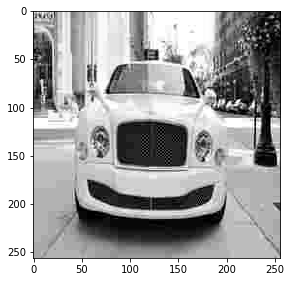

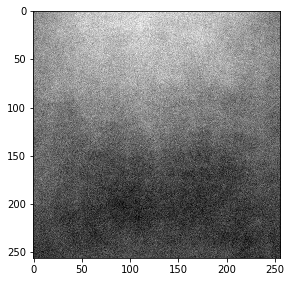

In [17]:
thing = train_generator_x.next()
prediction = model.predict(thing)

reconstruct(thing[0])
reconstruct(prediction[0])